In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [174]:
# we load the csv data and make datethe index
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates=True)

In [175]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [176]:
# Calculate the 2.5th and 97.5th percentiles
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

# Filter the DataFrame to keep only the rows within the bounds
filtered_df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
filtered_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


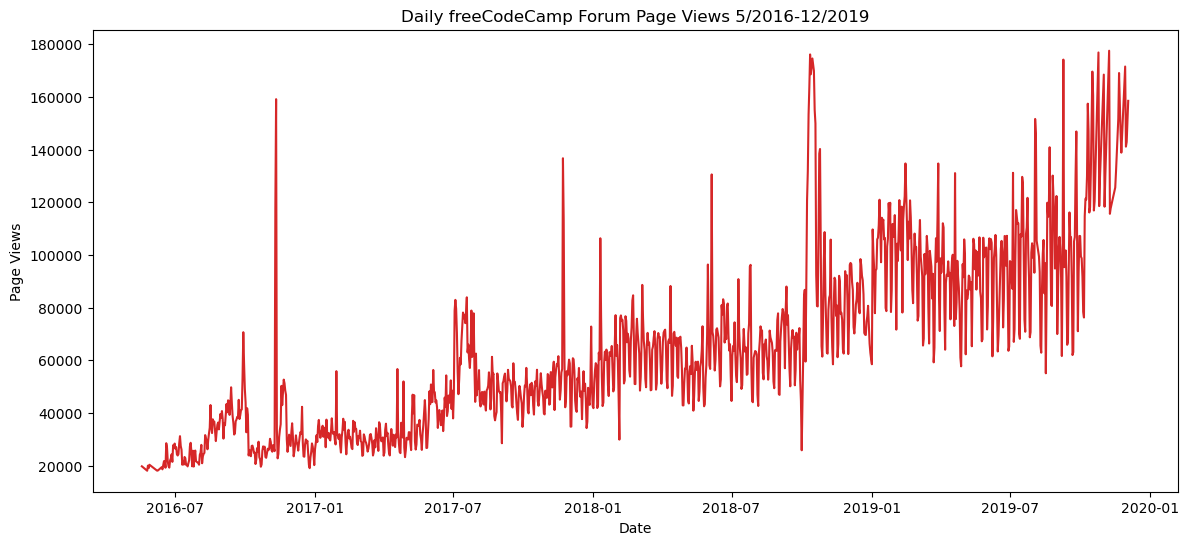

In [177]:
def draw_line_plot():
   
    # Create the line plot
    plt.figure(figsize=(14, 6))
    plt.plot(filtered_df.index, filtered_df['value'], color='tab:red')

    # Add title and labels
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save the plot as an image file
    plt.savefig('line_plot.png')

    # Show the plot
    return plt.show()

# Call the function to create the plot
draw_line_plot()


/var/folders/yw/qg8qgpv97jx9c_3txv4ghjlh0000gn/T/ipykernel_74468/1536227917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
/var/folders/yw/qg8qgpv97jx9c_3txv4ghjlh0000gn/T/ipykernel_74468/1536227917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


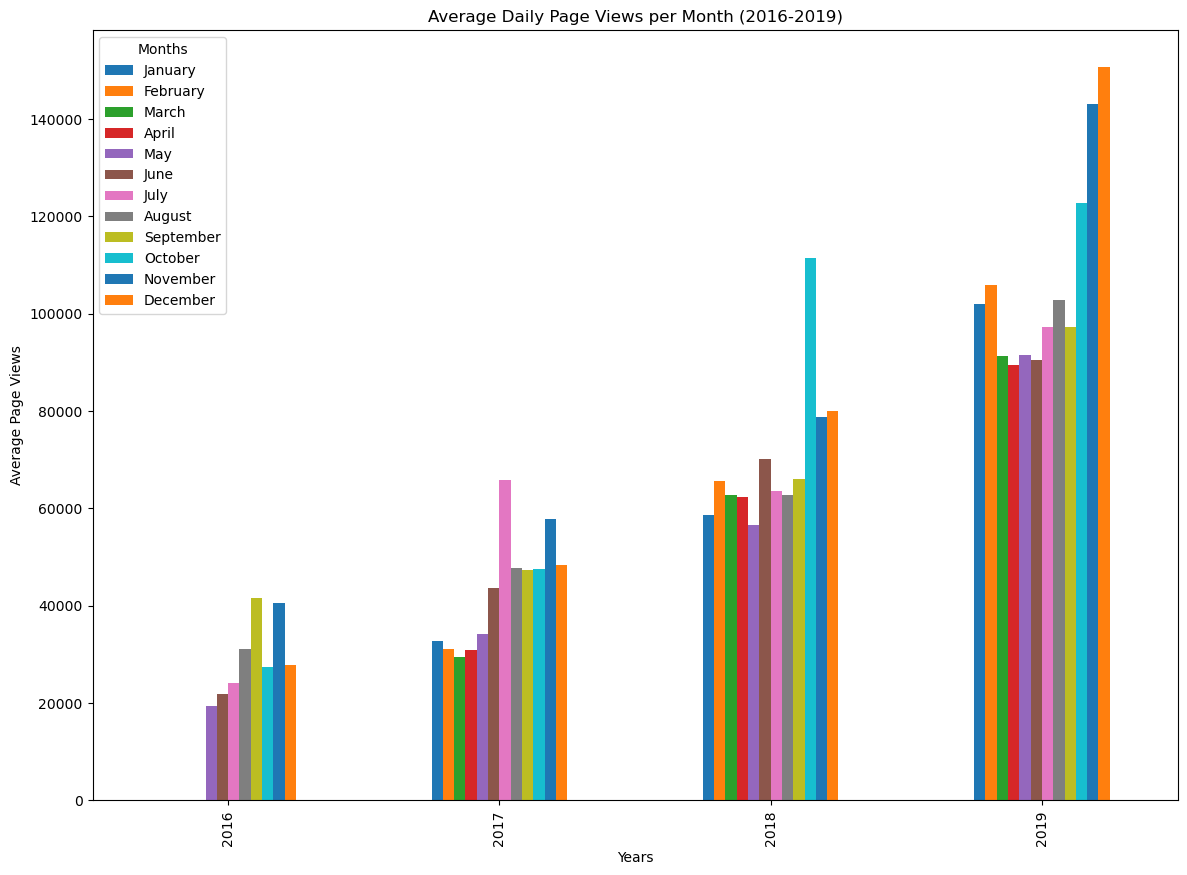

In [178]:
def draw_bar_plot():
    # make a copy of the dataset
    df=filtered_df
    # Add 'year' and 'month' columns to the DataFrame
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Group by 'year' and 'month' and calculate the mean of page views
    df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 10))
    df_grouped.plot(kind='bar', ax=ax)

    # Add title and labels
    ax.set_title('Average Daily Page Views per Month (2016-2019)')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    # Customize the legend
    ax.legend(title='Months', labels=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])

    # Save the plot as an image file
    plt.savefig('bar_plot.png')

    # Show the plot
    return plt.show()

# Call the function to create the plot
draw_bar_plot()


/var/folders/yw/qg8qgpv97jx9c_3txv4ghjlh0000gn/T/ipykernel_74468/3014940827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
/var/folders/yw/qg8qgpv97jx9c_3txv4ghjlh0000gn/T/ipykernel_74468/3014940827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/var/folders/yw/qg8qgpv97jx9c_3txv4ghjlh0000gn/T/ipykernel_74468/3014940827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

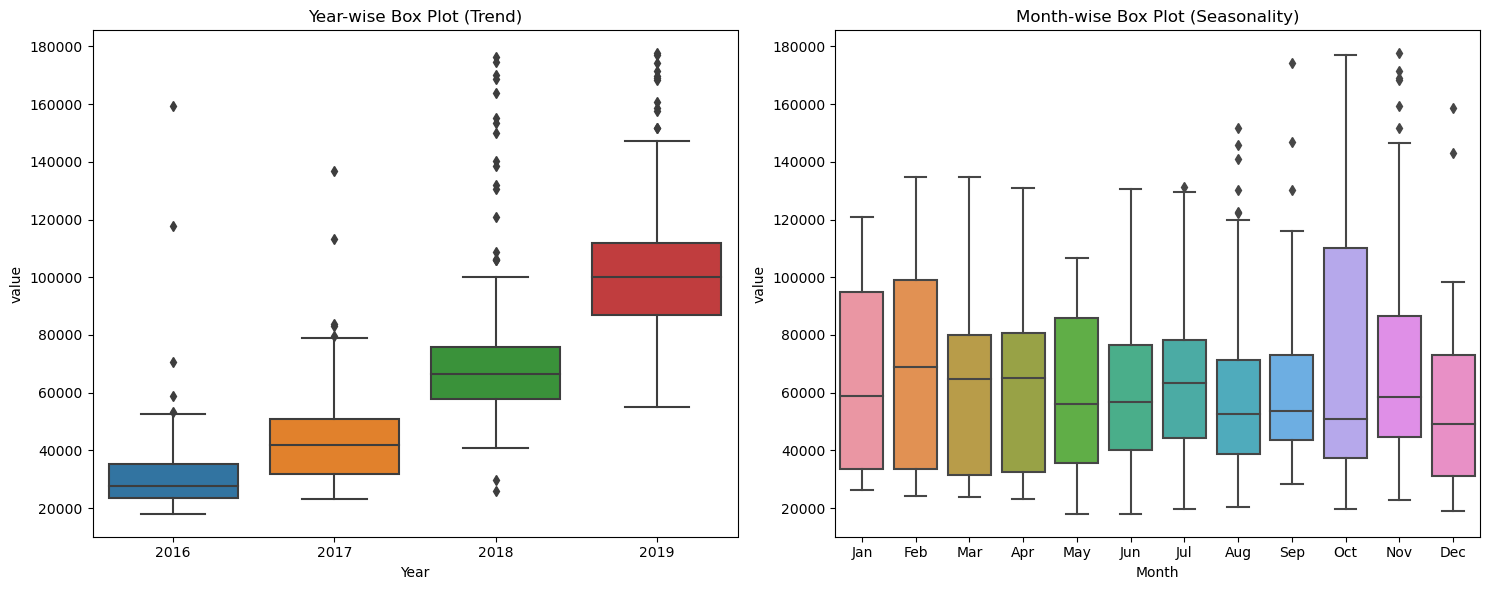

In [179]:
def draw_box_plot():
    # make a copy of the dataset
    df=filtered_df
    # Prepare data for the box plots
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['month_name'] = df.index.strftime('%b')

    # Order the months correctly
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Create the figure and axes for the box plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Year-wise Box Plot
    sns.boxplot(ax=axes[0], x='year', y='value', data=df)
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('value')

    # Month-wise Box Plot
    sns.boxplot(ax=axes[1], x='month_name', y='value', data=df, order=month_order)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('value')

    # Adjust the layout
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig('box_plot.png')

    # Show the plot
    return plt.show()

# Call the function to create the plot
draw_box_plot()
